#📌 Extracción

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos = pd.read_json("/content/drive/MyDrive/TelecomX_Data.json")

In [ ]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [ ]:
len(pd.unique(datos["customerID"]))

7267

In [ ]:
datos_customer = pd.json_normalize(datos['customer'])
datos_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [ ]:
datos_phone = pd.json_normalize(datos['phone'])
datos_phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [ ]:
datos_internet = pd.json_normalize(datos['internet'])
datos_internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [ ]:
datos_account = pd.json_normalize(datos['account'])
datos_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
total = pd.concat([datos, datos_customer, datos_phone, datos_internet, datos_account], axis=1)
total.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
total.drop(['customer', 'phone', 'internet', 'account'], axis=1, inplace=True)
total.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
total.isnull().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
total.drop(["MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"], axis=1, inplace=True)
total.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,DSL,One year,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,DSL,Month-to-month,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,Fiber optic,Month-to-month,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,Fiber optic,Month-to-month,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,Fiber optic,Month-to-month,Mailed check,83.9,267.4


In [ ]:
total.rename(columns={"Charges.Total": "TCharges"}, inplace=True)
total.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,Charges.Monthly,TCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,DSL,One year,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,DSL,Month-to-month,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,Fiber optic,Month-to-month,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,Fiber optic,Month-to-month,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,Fiber optic,Month-to-month,Mailed check,83.9,267.4


In [ ]:
total.rename(columns={"Charges.Monthly": "MCharges"}, inplace=True)
total.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MCharges,TCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,DSL,One year,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,DSL,Month-to-month,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,Fiber optic,Month-to-month,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,Fiber optic,Month-to-month,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,Fiber optic,Month-to-month,Mailed check,83.9,267.4


In [ ]:
total.query("TCharges == ' '")

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MCharges,TCharges
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,DSL,Two year,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,Two year,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,DSL,Two year,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,One year,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,Two year,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,No,Two year,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,DSL,Two year,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,No,Two year,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,DSL,Two year,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,DSL,Two year,Mailed check,80.85,


In [ ]:
total["TCharges"] = total["TCharges"].apply(lambda x: x.replace(' ', "0"))
total["TCharges"] = total["TCharges"].astype(np.float64)
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       7267 non-null   object 
 1   Churn            7267 non-null   object 
 2   gender           7267 non-null   object 
 3   SeniorCitizen    7267 non-null   int64  
 4   Partner          7267 non-null   object 
 5   Dependents       7267 non-null   object 
 6   tenure           7267 non-null   int64  
 7   PhoneService     7267 non-null   object 
 8   InternetService  7267 non-null   object 
 9   Contract         7267 non-null   object 
 10  PaymentMethod    7267 non-null   object 
 11  MCharges         7267 non-null   float64
 12  TCharges         7267 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 738.2+ KB


In [ ]:
total['Churn'] = total['Churn'].apply(lambda x: 1 if x == "Yes" else 0)
total['Partner'] = total['Partner'].apply(lambda x: 1 if x == "Yes" else 0)
total["Dependents"] = total['Dependents'].apply(lambda x: 1 if x == "Yes" else 0)
total['PhoneService'] = total['PhoneService'].apply(lambda x: 1 if x == "Yes" else 0)

total.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MCharges,TCharges
0,0002-ORFBO,0,Female,0,1,1,9,1,DSL,One year,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,DSL,Month-to-month,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,Fiber optic,Month-to-month,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,Fiber optic,Month-to-month,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,Fiber optic,Month-to-month,Mailed check,83.9,267.40


In [ ]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       7267 non-null   object 
 1   Churn            7267 non-null   int64  
 2   gender           7267 non-null   object 
 3   SeniorCitizen    7267 non-null   int64  
 4   Partner          7267 non-null   int64  
 5   Dependents       7267 non-null   int64  
 6   tenure           7267 non-null   int64  
 7   PhoneService     7267 non-null   int64  
 8   InternetService  7267 non-null   object 
 9   Contract         7267 non-null   object 
 10  PaymentMethod    7267 non-null   object 
 11  MCharges         7267 non-null   float64
 12  TCharges         7267 non-null   float64
dtypes: float64(2), int64(6), object(5)
memory usage: 738.2+ KB


In [ ]:
total["DCharges"] = total["MCharges"]/30
total.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MCharges,TCharges,DCharges
0,0002-ORFBO,0,Female,0,1,1,9,1,DSL,One year,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,DSL,Month-to-month,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,Fiber optic,Month-to-month,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,Fiber optic,Month-to-month,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,Fiber optic,Month-to-month,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

In [ ]:
total.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MCharges,TCharges,DCharges
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,64.720098,2277.182035,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


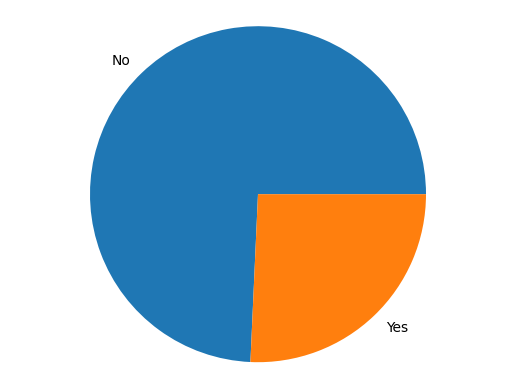

In [ ]:
churn = total['Churn'].value_counts()
manzanas = [churn[0], churn[1]]
nombres = ["No","Yes"]
plt.pie(manzanas, labels=nombres)
plt.axis("equal")
plt.show()

In [ ]:
female = total.query("gender == 'Female'")
male = total.query("gender == 'Male'")

churn_female = female['Churn'].value_counts()
churn_male = male['Churn'].value_counts()

women = [churn_female[0], churn_female[1]]
men = [churn_male[0], churn_male[1]]

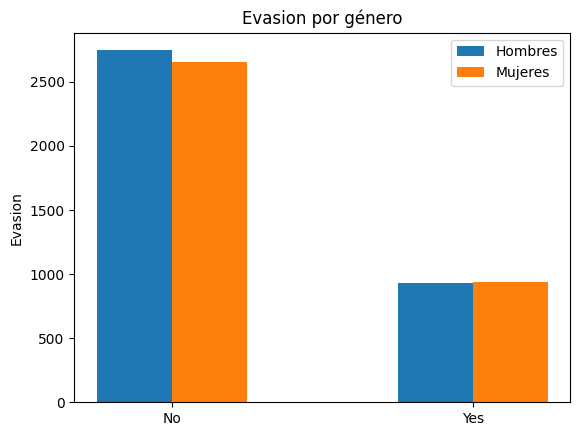

In [ ]:
n = 2
x = np.arange(n)
width = 0.25

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, men, width, label='Hombres')
rects2 = ax.bar(x + width/2, women, width, label='Mujeres')

ax.set_ylabel('Evasion')
ax.set_title('Evasion por género')
ax.set_xticks(x)
ax.set_xticklabels(nombres)
ax.legend()
plt.show()

In [ ]:
total['Contract'].value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [ ]:
month = total.query("Contract == 'Month-to-month'")
one = total.query("Contract == 'One year'")
two = total.query("Contract == 'Two year'")

churn_month = month['Churn'].value_counts()
churn_one = one['Churn'].value_counts()
churn_two = two['Churn'].value_counts()

month_churn = [churn_month[0], churn_month[1]]
one_churn = [churn_one[0], churn_one[1]]
two_churn = [churn_two[0], churn_two[1]]

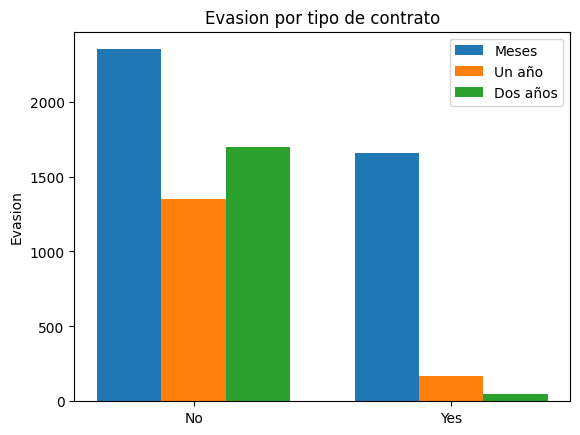

In [ ]:
n = 2
x = np.arange(n)
width = 0.25

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, month_churn, width, label='Meses')
rects2 = ax.bar(x, one_churn, width, label='Un año')
rects3 = ax.bar(x + width, two_churn, width, label='Dos años')

ax.set_ylabel('Evasion')
ax.set_title('Evasion por tipo de contrato')
ax.set_xticks(x)
ax.set_xticklabels(nombres)
ax.legend()
plt.show()

In [ ]:
total['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2445
Mailed check,1665
Bank transfer (automatic),1589
Credit card (automatic),1568


In [ ]:
electronic = total.query("PaymentMethod == 'Electronic check'")
mailed = total.query("PaymentMethod == 'Mailed check'")
credit = total.query("PaymentMethod == 'Credit card (automatic)'")
bank = total.query("PaymentMethod == 'Bank transfer (automatic)'")

churn_electronic = electronic['Churn'].value_counts()
churn_mailed = mailed['Churn'].value_counts()
churn_credit = credit['Churn'].value_counts()
churn_bank = bank['Churn'].value_counts()

electronic_churn = [churn_electronic[0], churn_electronic[1]]
mailed_churn = [churn_mailed[0], churn_mailed[1]]
credit_churn = [churn_credit[0], churn_credit[1]]
bank_churn = [churn_bank[0], churn_bank[1]]

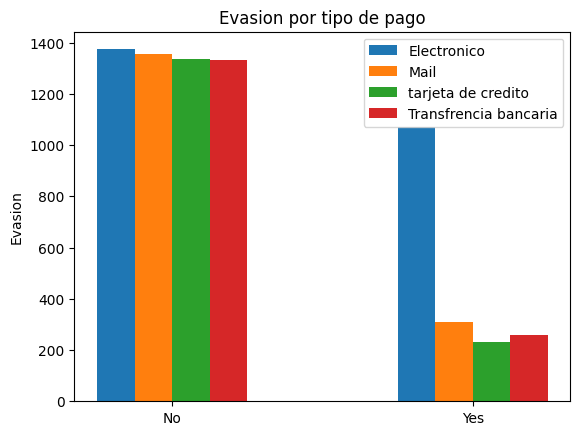

In [ ]:
n = 2
x = np.arange(n)
width = 0.25

fig, ax = plt.subplots()

rects1 = ax.bar(x - 3*width/4, electronic_churn, width/2, label='Electronico')
rects2 = ax.bar(x-width/4, mailed_churn, width/2, label='Mail')
rects3 = ax.bar(x + width/4, credit_churn, width/2, label='tarjeta de credito')
rects4 = ax.bar(x + 3*width/4, bank_churn, width/2, label='Transfrencia bancaria')

ax.set_ylabel('Evasion')
ax.set_title('Evasion por tipo de pago')
ax.set_xticks(x)
ax.set_xticklabels(nombres)
ax.legend()
plt.show()

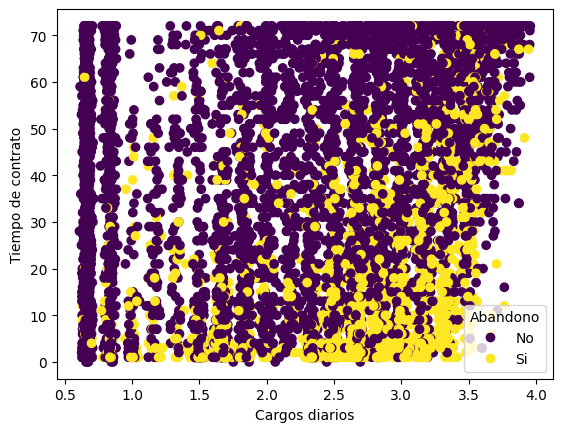

In [ ]:
_, ax = plt.subplots()
scatter = ax.scatter(total['DCharges'], total['tenure'], c=total['Churn'])
ax.set(xlabel="Cargos diarios", ylabel="Tiempo de contrato")
_ = ax.legend(
    scatter.legend_elements()[0], ["No","Si"], loc="lower right", title="Abandono"
)

#📄Informe final

Para este proyecto lo que se nos pidio fue relizar la limpeiza y el analisis de los datos para determinar las principales razones o circunstancias por las cuales los clientes de una compañia de telecomunicacion cambiaban de compañia.

La base de datos que nos proporcionaron en formato JSON se subio a una cuenta de drive para poder hacer el proceso de carga en el documento en linea, se importaron desde Google Drive utilizando las funciones de ```drive.mount``` y  ```pd.read_json``` de la libreria de pandas.

La limpieza de la base de datos se realizo principalmente con la ayuda de pandas, para extrar los datos que estaban anidados en las columnas conla ayuda de la funcion ```pd.json_normalize```, se separaron en distintas bases de datos que se unieron con la funcion ```pd.concat```, se le retiraron las columnas que se consideraron que influian menos al ambando como el servicio de internet, si tenian servicio telefonico, etc, con la funcion de ```.drop``` con eso ya se tenia la base de datos con la cual se trabajo.

Para el tratamiento de los datos se busco estadarizar un poco la base de datos, cambaindo Si y No por 1 y 0 respectivamente con las funciones ```.apply``` y ```lambda```, se genero una ultima columna que era el cobro diario en base al cobro mensual divido entre 30 y se eliminaron los datos vacion reemplazandolos por cero.

Para el analisis se reviso un resumen de los datos numericos como el promedio, la mediana, el minimo, el maximo asi como se deviacion estandar.

Se graficaron los datos textuales como el genero, tipo de contrato y tipo de pago para revisar cuales estaban mas relacionados con el abandono.

Se graficaron los cargos diarios y el tiempo de contrato para revisar que relacion tenian con el abandono de los usuarios.

Despues del analisis y las graficas que se obtuvieron de este proyecto se puede decir que hay una gran relacion entre el abandono y el tipo de pago asi como con el tipo de contrato, dandoce mas entre los que tienen como tipo de pago cheque electroinico y con un contrato de mes por mes.

Al mismo tiempo se garfico los cargos diaros y el tiempo de contrato dando una tendencia de mayor abando entre las personas con un mayores cargos diarios asi como los que tienen menos tiempo de contrato.

Lo que se pbtuvo del analisis que es que la mejor forma de mantener a los clientes es buscar amntener un precio bajo para los clientes nuevos asi como buscar contratos mas largos y con mas oportunidades de pago.